<a href="https://colab.research.google.com/github/StanAI7060/Something-new/blob/main/SineKerasExperiment_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the lowest loss to stop training: 0.02
1/1 [==============================] - 0s 30ms/step


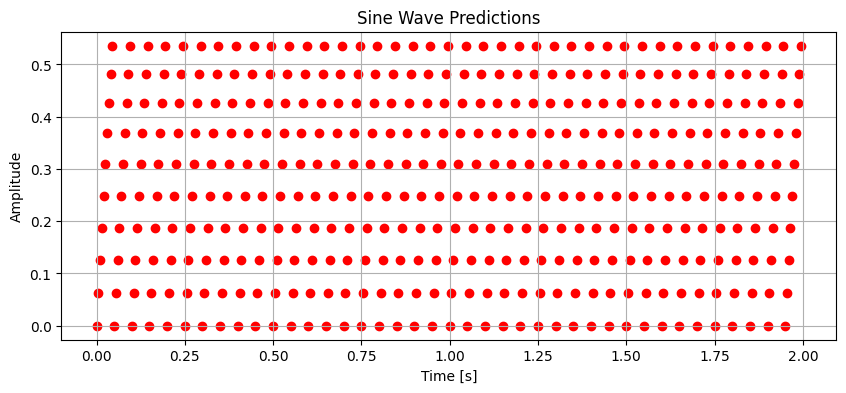

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


# i think the problem with this program is the the layers aren't configured well enough
#  or are not deep enough
# or i didn't let it run long enough
# i suspect the plot is correct it is just that the predicted value is just too far off
# also there may not be enough steps in the input
# the first step in debugging would be to comment out the line the plots the prediction

"""
the gaol of this program

First lets create a Python program the creates a flexible sine wave program that displays the sine wave

Can you rewrite this program so that it includes a Keras neural network that uses the output of the generate_sine_wave function as its training set.
The program should accept an input which sets a lowest loss level point for it to stop training.
Next the program should generate a testing data set one step at a time using the generate_sine_wave function. Each step of the test data generated should be fed into the neural network to get a prediction. Both the test set step data and the neural network prediction should be plotted. The test data should be plotted as a dot in the color Red and the neural network data should be plotted in Blue as a plus sign. Example “+”.


"""


def generate_sine_wave(amplitude, frequency, duration, samples_per_second=8000):
    # Time array at specified samples per second
    t = np.linspace(0, duration, int(samples_per_second * duration), endpoint=False)
    # Generate sine wave
    wave = amplitude * np.sin(2 * np.pi * frequency * t)
    return t, wave

def create_model():
    model = Sequential([
        Dense(10, activation='relu', input_shape=(1,)),
        Dense(10, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
    return model

if __name__ == "__main__":
    # Training data
    amplitude = 1.0
    frequency = 2.0
    duration = 2.0
    t, wave = generate_sine_wave(amplitude, frequency, duration)

    # Create model
    model = create_model()

    # Train model
    lowest_loss = float(input("Enter the lowest loss to stop training: "))
    history = model.fit(t, wave, batch_size=32, epochs=200, verbose=0)

    if history.history['loss'][-1] < lowest_loss:
        print("Training stopped due to low loss threshold reached.")

    # Testing data
    test_duration = 0.05  # duration for each step in the test
    test_amplitude = 1.0
    test_frequency = 2.0

    # Generate test data one step at a time and plot predictions
    plt.figure(figsize=(10, 4))
    for i in range(40):  # generate 40 steps of test data
        test_t, test_wave = generate_sine_wave(test_amplitude, test_frequency, test_duration, samples_per_second=200)
        predictions = model.predict(test_t)

        plt.scatter(test_t + i * test_duration, test_wave, color='red')  # plot test data in red dots
   #     plt.scatter(test_t + i * test_duration, predictions, color='blue', marker='+')  # plot predictions in blue plusses

    plt.title('Sine Wave Predictions')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()
